In [61]:
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import math
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [62]:
df = pd.read_csv("funda-amsterdam.csv")

In [63]:
df_pricecorr = df[df["price"] > 10000]

In [64]:
df_pricecorr.tail(1)

,Unnamed: 0,address,area,bedrooms,postal_code,posting_date,price,property_type,rooms,sale_date,url,year_built
11442,11442,Anna van Burenstraat 24 2,54,2,1055 VN,20-5-2015,165000,apartment,3,23-6-2015,http://www.funda.nl/koop/verkocht/amsterdam/ap...,1937


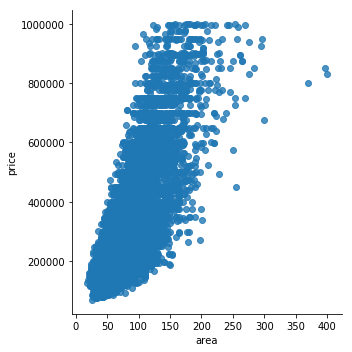

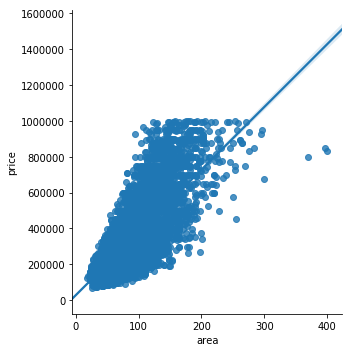

In [65]:
sns.lmplot(x='area', y='price', fit_reg=False, data=df_pricecorr)
sns.lmplot(x='area', y='price', data=df_pricecorr)

In [66]:
x = df_pricecorr[['area']] # have to 
y = df_pricecorr['price']
linear_model = LinearRegression().fit(x, y)

b0 = linear_model.coef_
b1 = linear_model.intercept_
print(f"The regression line is equal to y = {b0[0]:.3f} + {b1:.3f}x") 

The regression line is equal to y = 3498.814 + 27983.930x


The regression formula is: Y = 3498.814 + 27983.930x

In [67]:
print("The prediction price for a house of 70 m2 is:")
seventym2_houseprice = 3498.814 + (b1 * 70)
print(seventym2_houseprice)

The prediction price for a house of 70 m2 is:
1962373.9047313991


Or with the predict function:

In [68]:
linear_model.predict(70)[0]

272900.93507299176

the error is the difference in the predicted price vs the real price

In [72]:
# adding a predicted value into the dataframe
pd.options.mode.chained_assignment = None
df_pricecorr["price_p"] = linear_model.predict(x)

In [73]:
x = df_pricecorr[['area']]
y = df_pricecorr['price'] 
lm = LinearRegression()
lm.fit(x, y) 

# Calculating the residue
df_pricecorr['price_pred'] = lm.predict(x) 
df_pricecorr['resid'] = df_pricecorr['price'] - df_pricecorr['price_pred'] 

In [37]:
df_pricecorr.tail(5)

,Unnamed: 0,address,area,bedrooms,postal_code,posting_date,price,property_type,rooms,sale_date,url,year_built,price_p,price_pred,resid
11438,11438,Olympiaplein 83 -III,113,3,1077 CS,22-5-2015,599000,apartment,5,3-6-2015,http://www.funda.nl/koop/verkocht/amsterdam/ap...,1938,423349.952556,423349.952556,175650.047444
11439,11439,Anjeliersstraat 20,88,2,1015 NH,12-5-2015,399000,apartment,3,29-5-2015,http://www.funda.nl/koop/verkocht/amsterdam/ap...,1993,335879.593554,335879.593554,63120.406446
11440,11440,Rustenburgerstraat 389 I,77,2,1072 GV,6-6-2015,399000,apartment,4,19-6-2015,http://www.funda.nl/koop/verkocht/amsterdam/ap...,1906,297392.635594,297392.635594,101607.364406
11441,11441,Doggersbankstraat 12 II,90,3,1055 NX,2-5-2015,259000,apartment,4,19-5-2015,http://www.funda.nl/koop/verkocht/amsterdam/ap...,1931,342877.222275,342877.222275,-83877.222275
11442,11442,Anna van Burenstraat 24 2,54,2,1055 VN,20-5-2015,165000,apartment,3,23-6-2015,http://www.funda.nl/koop/verkocht/amsterdam/ap...,1937,216919.905312,216919.905312,-51919.905312


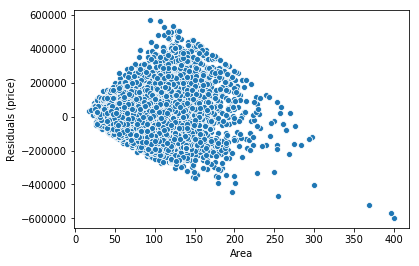

In [36]:
# Visualizing the differences (residual) in price in a scatterplot, to check the linearity.
sns.scatterplot(x='area',y='resid',data=df_pricecorr)
plt.xlabel('Area')
plt.ylabel('Residuals (price)')
plt.show()

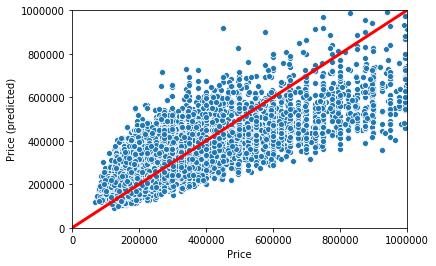

In [71]:
# Checking predicted price versus actual price
sns.scatterplot(x='price',y='price_pred',data=df_pricecorr)
plt.xlim(0, 1000000) #This sets the x-axis limits to (0, 5e10 = 5000000000)
plt.ylim(0, 1000000) #Ditto for y-axis. I want both axes to have the same length, so we can compare them
plt.plot([0, 2.5e10], [0, 2.5e10], color='red', lw=3) #This draws the straight red line, you can leave this out if you wish
plt.xlabel('Price')
plt.ylabel('Price (predicted)')
plt.show()

In [52]:
r2_score(df_pricecorr['price'], df_pricecorr['price_pred']) 

0.5257421182315432

The model fits 52.6%, which is ok. 

In [58]:
mean_squared_error = math.sqrt(mean_squared_error(df_pricecorr['price'], df_pricecorr['price_pred']))

In [59]:
print(f"mean squared error is {mean_squared_error}")

mean squared error is 118016.87861535022


expensive houses get predicted too cheap, and cheap houses get predicted too expensive. 
Overall, an okay fit, not too great. 